# Import Raspberry Pi Images

## Initialize

In [29]:
# Import Packages
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

import os
import glob

# Matplotlib inline
%matplotlib inline

In [11]:
# Load Images
# imset = np.array([cv2.imread(i) for i in glob.glob("../images/test_4/red_dots1.jpg")])
imset = np.array([cv2.imread(i) for i in glob.glob("../images/test_3/thefan.jpg")])
# imset = cv2.cvtColor(imset[0]

# print("Size of our dataset: {} images.\nEach image has dimensions: {}.\nEach channel is of type: {}".format( \
#     imset.shape[0], imset[0].shape, type(imset[0][0][0][0])))
type(imset[0])

numpy.ndarray

## Process Image
_Find interesting real-estate on the image_

### loop and look and slice and test to find the dots

_reference: https://stackoverflow.com/questions/8076889/how-to-use-opencv-simpleblobdetector _

#### Import Images

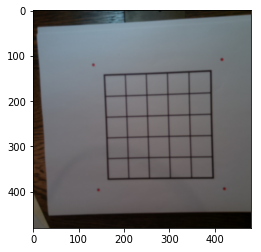

In [12]:
#TODO: GENERALIZE IMPORT OF IMAGES

# Select Image from imageset using opencv, show
img = imset[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


#### Initialize Detector

In [13]:
# Initialize Params
    # Ref: https://www.learnopencv.com/blob-detection-using-opencv-python-c/
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10
# Filter by Area.
params.filterByArea = True
#params.minArea = 1500
params.maxArea = 100
#filter by color
params.filterByColor = 1

# check opencv version and construct the detector
    # Ref: https://stackoverflow.com/questions/48136978/how-to-use-feature2dsuch-as-simpleblobdetector-correctly-python-opencv/48137140
is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

#### Detect Blobs

In [14]:
# Detect blobs
keypoints = detector.detect(img)

#### Display Results

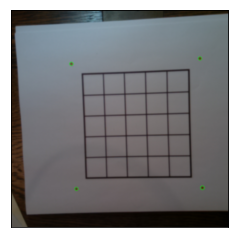

In [15]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# plt.imshow(im_with_keypoints, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(im_with_keypoints, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.savefig('lol.jpg', bbox_inches='tight')
plt.show()

# Save Image

#### Grab Coordinates of blobs

In [16]:
# print([keypoints[i].pt for i in range(3)])
points = [[keypoints[i].pt[0], keypoints[i].pt[1]] for i in range(4)]
print(points)

[[420.97772216796875, 393.0423583984375], [143.625244140625, 395.688720703125], [415.5755310058594, 108.44290924072266], [132.53018188476562, 120.39754486083984]]


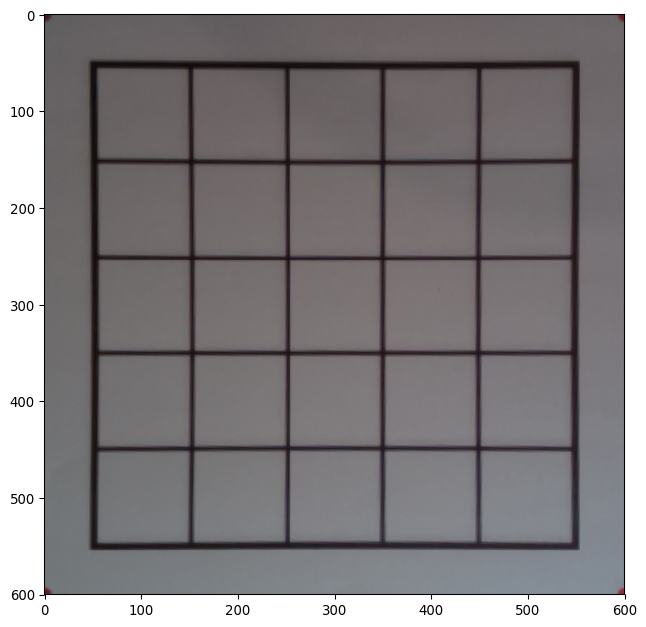

In [17]:


# define the input and output image points to warp
inpts = np.float32(points)
outpts = np.float32([[0, 0],[600, 0],[0, 600],[600, 600]])

# calculate a perspective transform based on the points given above
M = cv2.getPerspectiveTransform(inpts, outpts)

# warp the image perspective with the perspective transform calculated above
img_warp = cv2.warpPerspective(img, M, (600,600))

# display the warped image
plt.figure(figsize=(8, 8), dpi=96)
plt.imshow(img_warp, cmap='gray')
plt.show()

#### Cut the image into segments, export

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.nd

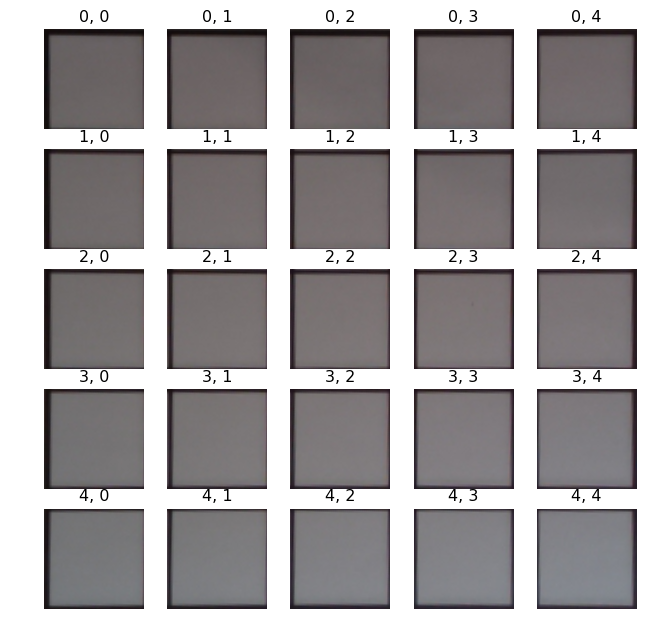

In [31]:
# create a figure to hold subplots for the split images
fig1 = plt.figure(figsize=(8, 8), dpi=96)

# create a list for the subplots which will be programmatically filled
axes = []

# create the 25 (5*5) subplots and put them in the list
xdim = 5
ydim = 5
cellsize = int(500 / xdim) # each cell is 96x96 pixels (480/5)
for row in range(0, ydim):
    for col in range(0, xdim):
        axes.append(plt.subplot2grid((xdim,ydim),(row,col)))
#         plt.savefig('../images/test_3/thefan_'+str(row)+'_'+str(col)+'.jpg', bbox_inches='tight')
        

# iterate through the list of subplots and draw them
cur = 0
onrow = 0
oncol = 0
for ax in axes:
    ax.axis('off')
    ax.set_title("%d, %d" % (onrow, oncol))
    # each subplot is a 96x96 slice of the warped image!
    cell = img_warp[(cellsize*onrow+50):(cellsize*onrow+cellsize+50), (cellsize*oncol+50):(cellsize*oncol+cellsize+50)]
    ax.imshow(cell, cmap='gray')
    print(type(ax))
    print(type(cell))
    Image.fromarray(cell).save('../images/test_3/thefan_'+str(cur)+'.jpg')
    cur = cur + 1
    if cur % xdim == 0:
        onrow = onrow + 1
    oncol = cur % xdim
        
plt.show()

3. Print set of doughnuts, dot them w/ marker, run blob detection [X]
4. Generalize process
5. Profit

## Generalize

In [53]:
# Import Packages
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

import os
import glob


# Instantiate Search Parameters
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
# Filter by Area.
params.filterByArea = True
#params.minArea = 1500
params.maxArea = 100
#filter by color
params.filterByColor = 1


# check opencv version and construct the detector
    # Ref: https://stackoverflow.com/questions/48136978/how-to-use-feature2dsuch-as-simpleblobdetector-correctly-python-opencv/48137140
is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

    
# Define directory
directory = str("../images/test_3/")


# Load Images
imset = np.array([cv2.imread(i) for i in glob.glob(str(directory)+"*.jpg")])

# Create Output folder
print(not os.path.exists(directory+"output"))
if (not os.path.exists(directory+"output")):
  os.mkdir(str(directory)+"output")  

#Iterate process over set of images
for i in range(len(imset)):
    img = imset[i]
    keypoints = detector.detect(img)

    # Grab points
    points = [[keypoints[i].pt[0], keypoints[i].pt[1]] for i in range(4)]

    # define the input and output image points to warp
    inpts = np.float32(points)
    outpts = np.float32([[0, 0],[600, 0],[0, 600],[600, 600]])
    
    # calculate a perspective transform based on the points given above
    M = cv2.getPerspectiveTransform(inpts, outpts)
    
    # warp the image perspective with the perspective transform calculated above
    img_warp = cv2.warpPerspective(img, M, (600,600))
    
    # create the 25 (5*5) subplots and put them in the list
    xdim = 5
    ydim = 5
    cur = 0
    onrow = 0
    oncol = 0
    
    cellsize = int(500 / xdim) # each cell is 96x96 pixels (480/5)        
    
    for row in range(0, ydim):
        for col in range(0, xdim):
            cell = img_warp[(cellsize*row+50):(cellsize*row+cellsize+50), (cellsize*col+50):(cellsize*col+cellsize+50)]
            Image.fromarray(cell).save(directory+'output/out_'+str(i)+'_'+str(row)+'_'+str(col)+'.jpg')

True
